In [1]:
import json
import pathlib

import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from IPython.display import FileLink, FileLinks

# we don't want out plots to show while building them
mpl_backend = matplotlib.get_backend()
matplotlib.use('Agg')

import py2gift.question
import py2gift.input_file
import py2gift.notebook
import py2gift.core
import py2gift.tex
import py2gift.file
import py2gift.time

# General settings

A settings manager object (with default options)

In [2]:
settings = py2gift.input_file.Settings(test_mode=False)

How many versions of a question are to be generated

In [3]:
n_instances = 2

Module `time` provides some functionality to keep tabs on the time required to do the whole exam. It's in `py2gift.time.TimeKeeper`.

In [4]:
time_keeper = py2gift.time.TimeKeeper()

# Matrix product

We need to specify
* the name of the Python class that implements this question
* the *category* to which the question will belong inside the *Moodle*'s question bank
* the *base* name for the question: several versions of the same question will be created, and they will be named "&lt;*question base name*&gt; &lt;*number of version in Roman numbers*&gt;". For instance, if the *question base name* is "Foo", we will get questions "Foo I", "Foo II",...

**Caveat**: the variables below are used by `%%statement` and `%%feedback` *magics* to know what to modify (they determine the *context*). So, when moving back and forth between questions (up and down in the jupyter notebook), one should at least re-run the cell below before modifying anything in the corresponding question.

In [5]:
class_name = 'MatrixProduct'
category_name = 'Calculus'
question_base_name='Product of matrices'

*Optionally*, one can also specify the estimated duration of the question

In [6]:
time = 10

The category is *registered* in the settings object

In [7]:
category_name = settings.add_category(category_name=category_name)

The question is registered in the newly-created category (notice the class `class_name` need not exist, this is just an statement of intent)

In [8]:
settings.add_or_update_class(
    category_name=category_name, class_name=class_name, question_base_name=question_base_name,
    n_instances=n_instances, time=time)

We let the time keeper object know about this one:

In [9]:
time_keeper.record(time, question_base_name)

The statement of the question is entered through an *ipython* magic since it allows to capture freely-typed text. In principle, the text can be anything but if you want different versions of the same question, it should contain some *variables* that will be filled by Python code. These variables are prefixed by `!`.

In [10]:
%%statement settings --cls {class_name} --category {json.dumps(category_name)}
Multiply the matrices $!A$ and $!B$ and compute the trace of the result.

'statement recorded'

In [11]:
%%feedback  settings --cls {class_name} --category {json.dumps(category_name)}
You just go row times column to get
$
A \times B
=
!product
$. Now, the trace is just the sum of the elements in the diagonal, i.e., !diagonal.

'feedback recorded'

The class implementing the question is defined. It should inherit from one of the classes in module `py2gift.question`:
* `py2gift.question.MultipleChoiceQuestionGenerator`: for multiple-choice questions
* `py2gift.question.NumericalQuestionGenerator`: for numerical-answer questions

The only mandatory method the new class must define is `setup`. Its purpose is to fill in the *blanks* in both the `statement` and `feedback` of the question by calling, respectively, `self.statement.fill` and `self.feedback.fill`. Also, it should provide:
* the solution and error tolerance for `py2gift.question.NumericalQuestionGenerator`: one should set `self.solution` to some **number** and `self.error` to either a **number or a string indicating a percentage**
* the right answer along with the wrong ones for `py2gift.question.MultipleChoiceQuestionGenerator`:

In order to generate several instances (versions) of the same question, random numbers (or pictures!!) must be used somewhere (otherwise all the instances of the question will be identical). For that purpose, when one inherits from a class in `py2gift.question`, a pseudo-random numbers generator, `self.prng`, is provided.

In [12]:
class MatrixProduct(py2gift.question.NumericalQuestionGenerator):
    
    def setup(self):
        
        A = self.prng.rand(2, 2)
        B = self.prng.rand(2, 2)

        self.statement.fill(
            A=A,
            B=B
        )
        
        product = A @ B
        
        self.feedback.fill(
            product=product,
            diagonal=py2gift.tex.enumerate_math(np.diag(product))
        )
        
        self.solution = product.trace()
        self.error = '10%'

We can easily preview *the first instance* of the question

In [13]:
py2gift.util.render_latex(py2gift.core.generator_to_markdown(
    settings.to_dict(), category_name, getattr(settings.fake_module, class_name)))


<span style="font-family:Papyrus; font-size:2em;">Statement</span>

Multiply the matrices $\Large \begin{bmatrix}0.375 & 0.951 \\ 0.732 & 0.599\end{bmatrix}$ and $\Large \begin{bmatrix}0.156 & 0.156 \\ 0.0581 & 0.866\end{bmatrix}$ and compute the trace of the result.





*Estimated time: 10 minutes*




<span style="font-family:Papyrus; font-size:2em;">Feedback</span>



You just go row times column to get

$\Large 
A \times B
=
\begin{bmatrix}0.114 & 0.882 \\ 0.149 & 0.633\end{bmatrix}
$. Now, the trace is just the sum of the elements in the diagonal, i.e., $\Large 0.114$ and $\Large 0.633$.

<span style="font-family:Papyrus; font-size:2em;">Solution</span>

 0.746386903509117 (error: .0746386903509117)


$\LaTeX$ formulas are enlarged (`\Large` is prepended) for better visualization inside the notebook, but they are kept as they were when written in the generated GIFT file. Also notice that `n_instances` of this question will actually be generated, though only the first one was shown here.

# Energy of a signal

In [14]:
time = 5

In [15]:
class_name = 'EnergySignal'
category_name = 'Signals'
question_base_name='Energy of a signal'

In [16]:
category_name = settings.add_category(category_name=category_name)
settings.add_or_update_class(
    category_name=category_name, class_name=class_name, question_base_name=question_base_name,
    n_instances=n_instances, time=time)
time_keeper.record(time, question_base_name)

In [17]:
%%statement settings --cls {class_name} --category {json.dumps(category_name)}
Compute the energy of the signal in the figure below
!signal

'statement recorded'

In [18]:
%%feedback  settings --cls {class_name} --category {json.dumps(category_name)}
We just need to square the signal and integrate it between $0$ and $!width$. Now, the slope of the line is clearly $!slope$, and hence
$
    E
    =
    \int_0^!width
    x(t)^2
    dt
    =
    \int_0^!width
    !slope^2t^2
    dt
    =
    !squared_slope
    \frac{t^3}{3}
    \Big|_0^!width
$

'feedback recorded'

If copy and pasting, you must remember to match the name of this class with whatever you specified above in `class_name`. Since this is a multiple-choice question, we should set
* `self.right_answer` to a **string** with the right answer
* `self.wrong_answers` to a **list of strings** with the wrong ones

In [19]:
%mkdir -p 'images'

In [20]:
class EnergySignal(py2gift.question.MultipleChoiceQuestionGenerator):
    
    def setup(self):
        
        # a random number for the slope...
        slope = self.prng.randint(1, 6) 
        
        # ...and another one for the width
        width = self.prng.randint(3, 10) 
        
        x = np.arange(width)
        y = slope*x
        
        extra = 4
        
        x = np.r_[np.arange(-extra, 0), x, np.arange(width-1, width + (extra - 1))]
        y = np.r_[np.zeros(extra), y, np.zeros(extra)]

        fig, ax = plt.subplots()
        ax.plot(x, y)
        ax.set_title('$x(t)$')
        
        # picture must be saved as an svg...
        signal = 'signal.svg'
        
        # ...but care must be taken so that every random picture has a different name
        signal = py2gift.file.unique_name(signal)
        
        fig.savefig(signal, transparent=True)
        
        # after the file is created, we don't need it anymore (and it's taking up resources)
        plt.close()
        
        self.statement.fill(signal=signal)
        
        # since `np.arange` stops right before the argument,
        width -= 1
        
        squared_slope = slope**2
        
        self.feedback.fill(
            width=width,
            slope=slope,
            squared_slope=squared_slope
        )
        
        solution = width**3 * squared_slope / 3
        
        # whatever is passed as the "right answer" must be a string...
        self.right_answer = py2gift.tex.from_number(solution, precision=3, fixed_point_format=True)
        
        # ...and so must the wrong "answers"; for generating wrong answers we use the
        # method `wrong_numerical_solutions_from_correct_one` from `py2gift.util` module
        self.wrong_answers = py2gift.util.wrong_numerical_solutions_from_correct_one(
            solution=solution, n=7,
            min_sep=0.5*solution,
            max_sep=solution,
            precision=3, fixed_point_format=True,
            bin_width=0.5,
            lower_bound=0, unique=True, prng = self.prng)
        

# for previewing the question
py2gift.util.render_latex(py2gift.core.generator_to_markdown(
    settings.to_dict(), category_name, getattr(settings.fake_module, class_name)))


<span style="font-family:Papyrus; font-size:2em;">Statement</span>

Compute the energy of the signal in the figure below

![](signal_b60267be-c856-11ec-b269-d8cb8aeac823.svg)





*Estimated time: 5 minutes*




<span style="font-family:Papyrus; font-size:2em;">Feedback</span>



We just need to square the signal and integrate it between $\Large 0$ and $\Large 6$. Now, the slope of the line is clearly $\Large 4$, and hence

$\Large 
    E
    =
    \int_0^6
    x(t)^2
    dt
    =
    \int_0^6
    4^2t^2
    dt
    =
    16
    \frac{t^3}{3}
    \Big|_0^6
$

<span style="font-family:Papyrus; font-size:2em;">Choices</span>

* **<font color='green'>1152.000</font>**
* **<font color='red'>2293.000</font>**
* **<font color='red'>1771.500</font>**
* **<font color='red'>515.500</font>**
* **<font color='red'>28.500</font>**
* **<font color='red'>1961.000</font>**
* **<font color='red'>411.000</font>**
* **<font color='red'>2250.000</font>**


# Time

Accumulated time: 15 minutes


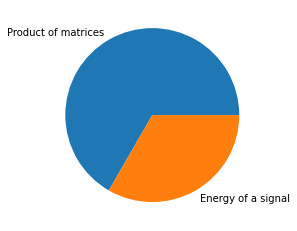

In [21]:
matplotlib.use(mpl_backend)
time_keeper.plot()
print(time_keeper)

# Generating the GIFT file

In [22]:
# %%script false --no-raise-error
local_run = True
embed_images = True
py2gift.core.build(
    settings.to_dict(), local_run=local_run, questions_module=settings.fake_module, parameters_file={},
    no_checks=True, embed_images=embed_images)

category:   0%|          | 0/2 [00:00<?, ?it/s]

question:   0%|          | 0/2 [00:00<?, ?it/s]

question:   0%|          | 0/2 [00:00<?, ?it/s]

file "quiz.gift.txt" created


Retrieve the created file from the link below (not present in the docs).

In [23]:
from IPython.display import FileLink, FileLinks
FileLink('quiz.gift.txt')

/home/manu/py2gift/examples/quiz.gift.txt